In [1]:
import pandas as pd 

In [2]:
import os
print(os.getcwd())


c:\Users\rey_d\Documents\GitHub\An-lisis-de-inversion-inmobiliario\notebooks


In [3]:
df = pd.read_csv(r'../data\listingsValencia.csv')

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### CAMBIO DE TIPOS

In [5]:
# lo primero que podemos comprobar es el tipo de dato de cada columna
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [6]:
#cambiamos lastreview de object a datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [7]:
#Añadimos una columna llamada ciudad
df['city'] = 'Valencia'

In [8]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
0,48154,Precioso apartamento con wifi,219476,Antonio,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,154.0,3,177,2024-12-01,1.01,4,177,27,VT-41540-V,Valencia
1,137143,PENTHOUSE ON FRONT LINE BEACH,670775,Cpi Gestión Encuentra Tu Mansión,POBLATS DEL SUD,EL SALER,39.36335,-0.31932,Entire home/apt,390.0,10,1,2013-07-02,0.01,5,64,0,VT32745V,Valencia


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import sys
!{sys.executable} -m pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Comprobación de duplicados

In [11]:
df.duplicated().sum() #comprueba si hay duplicados

np.int64(0)

In [12]:
#comprobación de duplicados parciales
df_dup = df[df.duplicated(subset=['name', 'price', 'latitude', 'longitude'], keep=False)]
print(df_dup)


                       id                                        name  \
211               5956116         3 Bedrooms Apartment with free WIFI   
212               5956427         3 Bedrooms Apartment with free WIFI   
213               5956789         3 Bedrooms Apartment with free WIFI   
216               5957190      Centric 3 bedrooms Apartment with WIFI   
217               5957237      Centric 3 bedrooms Apartment with WIFI   
302               8399670      Centric 3 bedrooms Apartment with WIFI   
304               8399979      Centric 3 bedrooms Apartment with WIFI   
305               8400164      Centric 3 bedrooms Apartment with WIFI   
1340             26951498                  Bergamot House Single Room   
1344             26956688                 Bergamot House Double Suite   
1348             27013946               Bergamot House Suite Superior   
1349             27014295               Bergamot House Suite Superior   
1350             27014310               Bergamot Ho

In [13]:
df_dup.duplicated().sum() #comprueba si hay duplicados en las columnas seleccionadas

np.int64(0)

In [14]:
df_dup.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
211,5956116,3 Bedrooms Apartment with free WIFI,30912672,Apartamentos FV Flats Valencia,CAMINS AL GRAU,ALBORS,39.4696,-0.35387,Entire home/apt,186.0,2,47,2025-02-15,0.39,15,111,6,VT-32553-V,Valencia
212,5956427,3 Bedrooms Apartment with free WIFI,30912672,Apartamentos FV Flats Valencia,CAMINS AL GRAU,ALBORS,39.4696,-0.35387,Entire home/apt,186.0,2,21,2025-01-03,0.19,15,110,3,VT-32555-V,Valencia


In [15]:
# Mostrar todas las filas duplicadas (considerando todas las columnas)
duplicados = df[df.duplicated(keep=False)]

print("Filas duplicadas (todas las columnas):")
print(duplicados)


Filas duplicadas (todas las columnas):
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license, city]
Index: []


### comprobación de nulos

In [16]:
df.isnull().sum() #comprueba si hay valores nulos

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              689
minimum_nights                       0
number_of_reviews                    0
last_review                       1553
reviews_per_month                 1553
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6234
city                                 0
dtype: int64

In [17]:
df.isnull().sum() / len(df) * 100 #porcentaje de valores nulos por columna

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              7.787951
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       17.553973
reviews_per_month                 17.553973
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           70.464564
city                               0.000000
dtype: float64

In [18]:
df['reviews_per_month'].max() #valor mínimo de la columna reviews_per_month

np.float64(34.85)

<Axes: >

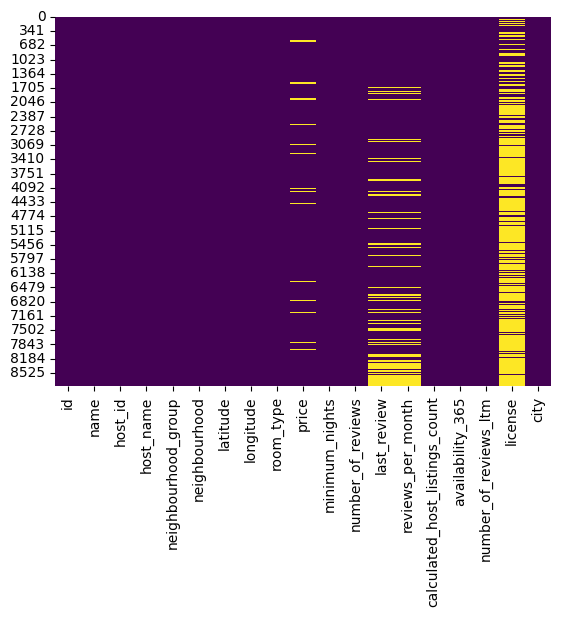

In [19]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualiza los valores nulos

In [20]:
# al no corresponder a ninguno, cambiamos el valor nulo a sin datos
df['license'] = df['license'].fillna('Sin datos')

In [21]:
#creamos copia de df para no modificar el original
#df_nuevo_valencia = df.copy()

In [22]:
#df_nuevo_valencia = df_nuevo_valencia[['number_of_reviews', 'last_review', 'reviews_per_month','id']]

In [23]:
df = df[df['last_review'].isnull()]
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
11,276455,"Great Room in an apartment,Valencia",1444357,Alberto,ALGIROS,LA CARRASCA,39.473170,-0.339320,Private room,38.0,2,0,NaT,NaN,1,285,0,Sin datos,Valencia
56,909800,I rent luxury flat Valencia(Spain),4877564,Andrea,POBLATS MARITIMS,EL GRAU,39.461570,-0.331240,Entire home/apt,40.0,360,0,NaT,NaN,1,365,0,Sin datos,Valencia
103,1895636,Luxury Attic Old town Valencia,9609511,James,CIUTAT VELLA,LA XEREA,39.473430,-0.371010,Entire home/apt,174.0,30,0,NaT,NaN,1,365,0,Sin datos,Valencia
125,2655162,Piso en el casco antiguo. El carmen,13592216,Ana,CIUTAT VELLA,EL CARME,39.476350,-0.382610,Entire home/apt,215.0,1,0,NaT,NaN,1,365,0,Sin datos,Valencia
141,3275736,ÁTICO CON TERRAZA IDEAL PAREJAS,670775,Cpi Gestión Encuentra Tu Mansión,EL PLA DEL REAL,JAUME ROIG,39.484000,-0.363200,Entire home/apt,NaN,10,0,NaT,NaN,5,0,0,VT32017V,Valencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8842,1376678698998326371,Habitación cómoda en Valencia,479804425,Antonia,CAMINS AL GRAU,ALBORS,39.468313,-0.354868,Private room,37.0,1,0,NaT,NaN,1,363,0,Sin datos,Valencia
8843,1376702369604981548,Belmar Apartments 6. WiFi + A/C+8 Pax,14182776,Alberto,EXTRAMURS,ARRANCAPINS,39.465889,-0.388842,Entire home/apt,141.0,1,0,NaT,NaN,68,8,0,VT-56648-V,Valencia
8844,1376713264151194058,El mejor barrio para las fallas,4020456,Grace,L'EIXAMPLE,RUSSAFA,39.462151,-0.372113,Entire home/apt,190.0,1,0,NaT,NaN,1,340,0,Sin datos,Valencia
8845,1376757432745262395,Ca La Leni Beach 0. WiFi + A/C + 2 Pax,14182776,Alberto,POBLATS MARITIMS,CABANYAL-CANYAMELAR,39.474118,-0.328023,Entire home/apt,79.0,1,0,NaT,NaN,68,350,0,AV-37,Valencia


In [24]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [25]:
#Rellenar los valores nulos con una fecha por defecto,
df['last_review'] = pd.to_datetime(df['last_review'])  # Asegura el tipo datetime
latest_date = df['last_review'].max()
df['last_review'] = df['last_review'].fillna('2000-01-01')


In [26]:
print(df['last_review'].notna().sum())


1553


In [28]:
#ver los valores no válidos en 'last_review'
invalid_dates = df.loc[
    pd.to_datetime(df['last_review'], errors='coerce').isna(),
    'last_review'
].unique()

print("Valores no válidos en 'last_review':", invalid_dates)



Valores no válidos en 'last_review': <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


In [29]:
# Cuántas filas totales tienes
print("Total filas:", len(df))

# Cuántos valores no nulos tiene la columna last_review
print("Valores válidos en last_review:", df['last_review'].notna().sum())

# Muestra primeras filas de la columna last_review para ver qué hay
print(df['last_review'].head(10))


Total filas: 1553
Valores válidos en last_review: 1553
11    2000-01-01
56    2000-01-01
103   2000-01-01
125   2000-01-01
141   2000-01-01
239   2000-01-01
246   2000-01-01
249   2000-01-01
266   2000-01-01
297   2000-01-01
Name: last_review, dtype: datetime64[ns]


In [30]:
print(df['last_review'].describe())


count                   1553
mean     2000-01-01 00:00:00
min      2000-01-01 00:00:00
25%      2000-01-01 00:00:00
50%      2000-01-01 00:00:00
75%      2000-01-01 00:00:00
max      2000-01-01 00:00:00
Name: last_review, dtype: object


<Axes: >

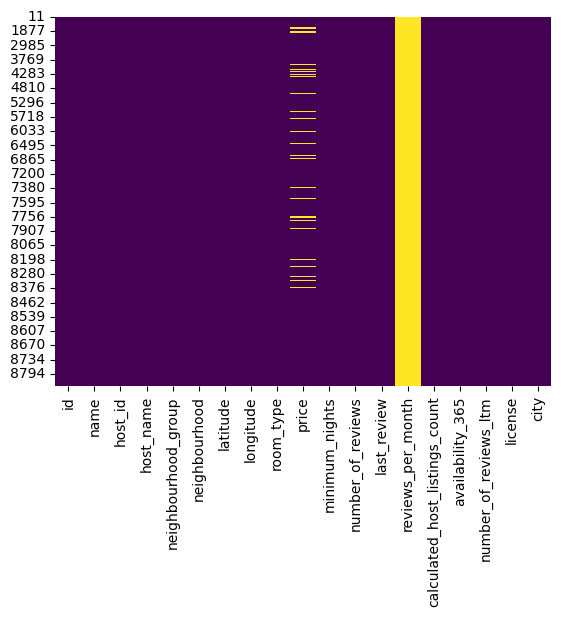

In [31]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualiza los valores nulos

In [32]:
#Tratar nulos como 0 antes de sumar

df['reviews_per_month'].fillna(0).sum()

np.float64(0.0)

In [33]:
#Recomendación de limpieza completa. 
# Rellenar valores nulos con 0, asumiendo que si no hay dato, no hubo reviews.
# Redondear al entero más cercano (por ejemplo: 2.4 → 2, 2.6 → 3).
#Convertir a tipo entero (int).
df['reviews_per_month'] = df['reviews_per_month'].fillna(0).round().astype(int)


In [34]:
df.isnull().sum()  # Verificar si quedan valores nulos

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                             118
minimum_nights                      0
number_of_reviews                   0
last_review                         0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                             0
city                                0
dtype: int64

In [35]:
print("Total de precios nulos:", df['price'].isnull().sum())

Total de precios nulos: 118


In [36]:
#Revisar columnas comparables 

print("Columnas disponibles:", df.columns)
print("Tipos de habitación:", df['room_type'].unique())
print("Barrios únicos:", df['neighbourhood'].nunique())

# Promedio de precio por tipo de habitación y barrio
print(df.groupby(['neighbourhood', 'room_type'])['price'].mean().head(10))

Columnas disponibles: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'city'],
      dtype='object')
Tipos de habitación: ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']
Barrios únicos: 80
neighbourhood  room_type      
AIORA          Entire home/apt    164.323529
               Private room        78.428571
ALBORS         Entire home/apt    149.230769
               Private room        40.111111
ARRANCAPINS    Entire home/apt    134.470588
               Private room        64.913043
BENICALAP      Entire home/apt    602.473684
               Private room        51.454545
BENIFERRI      Private room        37.000000
BENIMACLET     Entire home/apt    132.785714
Name: price, dtype: float64


In [38]:
#Rellenar precios faltantes con promedio de registros similares

# Calcular el promedio de precio por combinación barrio + tipo de habitación
precio_promedio = df.groupby(['neighbourhood', 'room_type'])['price'].mean()

# Función para imputar
def imputar_precio(fila):
    if pd.isnull(fila['price']):
        return precio_promedio.get((fila['neighbourhood'], fila['room_type']), df['price'].mean())
    return fila['price']

# Aplicar la función a todas las filas
df['price'] = df.apply(imputar_precio, axis=1)

In [39]:
print("Precios nulos restantes:", df['price'].isnull().sum())


Precios nulos restantes: 0


In [40]:
df.isnull().sum()  # Verificar si quedan valores nulos

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
city                              0
dtype: int64

In [41]:
df_limpio_valencia = df.copy()

In [42]:
#guardamos
df_limpio_valencia.to_csv("..\data\Valencia_limpio.csv", index=False)
